## <img src="deepcyc-logo.png" alt="DeepCyc logo" style="height: 30px; display: inline"/> DeepCyc API - Basic Tutorial

### Introduction
DeepCyc is Reak's Global Probabilistic Hazard Model, providing a comprehensive and high-resolution assessment of tropical cyclone risk on a global scale. It offers valuable insights and data that can be used to understand and manage the potential hazards associated with tropical cyclones.

In this notebook, we will provide a basic tutorial on how to use Reask's Python client API to access and retrieve data from DeepCyc. The Python client API serves as a powerful tool that allows users to interact with DeepCyc and utilize its data for various purposes. By following this tutorial, you will gain hands-on experience in using the Reask Python client API, enabling you to effectively leverage the capabilities of DeepCyc for your specific needs and applications.

To execute this notebook and access the Reask API servers, you will need valid credentials. If you don't have credentials yet, please contact someone@reask.earth to request your credentials. These credentials will grant you access to the Reask servers, ensuring that you can fully explore and utilize the DeepCyc API.

### Required Packages

Prior to beginning, it is necessary to import Python modules that are required to execute the code in this Jupyter notebook. These packages provide additional functionalities and resources that will be utilized throughout the notebook.

In [1]:
import pandas as pd
import geopandas as gpd
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

from folium import Circle, GeoJson, Map, Marker, Polygon, PolyLine
from folium.plugins.fast_marker_cluster import FastMarkerCluster
from pathlib import Path

Additionally, please ensure that the project root is added to the Python path by executing the following code:

In [2]:
# Add project root to the path
current_path = Path(os.path.abspath('.'))
sys.path.append(str(current_path.parent))

By importing these packages and adding the project root to the Python path, you will have access to the necessary functionalities and resources needed for running the code in this notebook.

## DeepCyc client
Reask API client offers Python classes that streamline the procedure of interacting with Reask API servers.

To utilize the client, simply import it from the `reaskapi` package and create a new instance of the DeepCyc object.

During instantiation, DeepCyc will authenticate with the Reask API by utilizing the credentials stored in your credentials file located at `${HOME}/.reask`. The authentication token will be stored in memory for future use.

Follow the steps below to initialize the DeepCyc client:

1. Import the `DeepCyc` client from the `reaskapi.deepcyc` module.
2. Create a new instance of the `DeepCyc` object.

In [3]:
from reaskapi.deepcyc import DeepCyc

# Initialize DeepCyc client
deepcyc_client = DeepCyc()

2023-06-22 13:48:01,223 - INFO - reaskapi.auth:31 - Authenticating


## DeepCyc API: Querying by Point or Gate
The DeepCyc API offers powerful capabilities to query tropical cyclone risk data based on specific points of interest or defined areas using gates. These querying methods provide valuable insights into the potential hazards and risks associated with tropical cyclones. Let's explore these two approaches in more detail:

Point Query
The point query method allows you to retrieve tropical cyclone risk information for a specific latitude and longitude coordinate. By providing the geographical coordinates of your point of interest, you can obtain detailed data on windspeeds, event identifiers, and other attributes associated with the location. This method is particularly useful when you need information for a specific location and want to understand the potential impact of tropical cyclones in that area.

Gate Query
The gate query method expands on the point query capability by allowing you to define a line, polygon, or circle as a gate to retrieve tropical cyclone events that cross or fall within that boundary. This method provides a broader view of the events occurring within the gate, enabling you to analyze tropical cyclone impacts over larger areas. You can retrieve information such as windspeeds, event identifiers, and spatial distribution of events within the defined gate. This method is beneficial when you want to assess the cyclone activity across a region or study the interaction of cyclones with specific geographic features.

Both the point and gate query methods offer flexibility and customization options, allowing you to specify additional parameters such as epoch, terrain correction, wind averaging, and units. This level of granularity ensures that you can tailor your queries to meet your specific requirements and obtain the most relevant and accurate information.



### Query by Point

The most basic way to query the DeepCyc API is by providing the geographical coordinates of a point of interest.

In this tutorial, we will keep it simple and use the default options for epoch, terrain correction, and wind averaging parameters.

The point function accepts several parameters that we will explore in other tutorial. These parameters allow you to customize the query according to your specific requirements. Here are the available parameters:

- `epoch`: Specifies the time period for which you want to retrieve data. The default value is set to 'Present Day'.
- `units`: Defines the units in which the wind speeds will be returned. The default value is 'kph' (kilometers per hour), but you can also choose 'mph' (miles per hour).
- `terrain_correction`: Specifies the type of terrain correction to apply to the wind speeds. The default value is 'FT_GUST', which stands for Full Terrain 3-second Gust correction. Other options include 'OT' (Open Terrain), 'OW' (Open Water), and 'NT' (No Terrain).
- `wind_averaging`: Defines the time interval over which the wind speeds are averaged. The default value is '3-second', but you can also select '1-minute'.

The code snippet below demonstrates how to utilize the client to query an arbitrary location in Alabama.

In [4]:
lat_point = [25.475]
lon_point = [-80.465]

results_point = deepcyc_client.point(lat_point, lon_point)

2023-06-22 13:48:07,938 - INFO - reaskapi.api_client:56 - querying deepcyc/point took 5080ms


By executing this code, you will obtain the results for the specified latitude and longitude coordinates using the point method of the DeepCyc client.

The results_point variable will store the retrieved information, allowing you to further analyze and utilize the data as needed.

Let's print the JSON results of the `results_point` variable using a helper function to reduce the verbosity of the results just for visualization purposes:

In [5]:
# Utility function to print shortened JSON
def pretty_print_json(json_data):
    def shorten_array(array):
        if len(array) <= 2:
            return array
        return [array[0], array[-1]]

    def prettify(obj):
        if isinstance(obj, dict):
            return {k: prettify(v) for k, v in obj.items()}
        elif isinstance(obj, list):
            return shorten_array([prettify(item) for item in obj])
        else:
            return obj

    return prettify(json_data)

# Pretty print the JSON
pretty_print_json(results_point)

{'features': [{'geometry': {'coordinates': [[[-80.46875, 25.46875],
      [-80.46875, 25.46875]]],
    'type': 'Polygon'},
   'properties': {'cell_id': 435908560,
    'event_ids': ['cc6e3e4fef5c22b4c034', 'e06153192d7826110534'],
    'latitude': 25.475,
    'longitude': -80.465,
    'windspeeds': [310.0, 60.0],
    'year_ids': ['2005_0495_RAN', '1980_0723_RAN']},
   'type': 'Feature'}],
 'header': {'epoch': 'Present_Day',
  'product': 'DeepCyc-2.0.6',
  'simulation_years': 41000,
  'terrain_correction': 'FT_GUST',
  'units': 'kph',
  'wind_averaing_period': '3-seconds'},
 'type': 'FeatureCollection'}

The results_point variable contains a [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON)  containing geographical features and their corresponding properties. The geometry feature is a rectangle representing the corresponding Reask's Global Grid pixel for the provided location.

Under the properties of each feature in the results you will find the following attributes:

- `cell_id`: Reask's global high-resolution cell identifier
- `event_ids`: a list of event identifiers
- `latitude`: the requested latitude
- `longitude`: the requested longitude
- `windspeeds`: a list of wind speeds
- `year_ids`: a list of year identifiers

The header contains information about the parameters used to request the data, the product name and the number of simulation years.

By printing and examining the `results_point` variable, you can gain a better understanding of the structure and contents of the retrieved data. This will help you further analyze and utilize the information for your specific requirements.

The results obtained from DeepCyc API are in the form of a GeoJSON object which can be converted to a data frame using the GeoPandas library.

Here's how you can convert the results to a GeoDataFrame:

In [6]:
# Convert results to GeoDataFrame
df_point = gpd.GeoDataFrame.from_features(results_point).set_index('cell_id')

df_point

,geometry,event_ids,latitude,longitude,windspeeds,year_ids
cell_id,,,,,,
435908560,"POLYGON ((-80.46875 25.46875, -80.46875 25.478...","[cc6e3e4fef5c22b4c034, b13a0d14d81c4695a962, e...",25.475,-80.465,"[310.0, 300.0, 300.0, 286.0, 283.0, 281.0, 280...","[2005_0495_RAN, 2013_0936_RAN, 1991_0181_RAN, ..."


By using the from_features method of GeoDataFrame and passing the `results_point` variable, we can create a GeoDataFrame. Setting the index to `cell_id` allows for easier indexing and referencing of the data.

To visualize the wind distribution over the years, we can create a box plot using the wind speeds from the GeoDataFrame. Here's the code to plot the box plot:

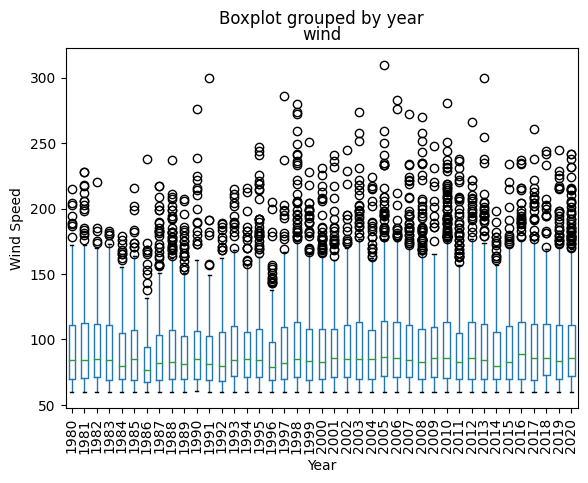

In [7]:
point_winds = df_point.iloc[0]['windspeeds']
point_years = [int(y[0:4]) for y in df_point.iloc[0]['year_ids']]

# Create a DataFrame with wind speeds and corresponding years
df_winds = pd.DataFrame({'wind': point_winds, 'year': point_years})

# Plot the box plot
ax = df_winds.boxplot(column='wind', by='year', vert=True, grid=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Wind Speed')

# Show the plot
plt.show()

A box plot will be generated, visualizing the distribution of wind speeds over the years. Each box represents the interquartile range (IQR), with the median indicated by a line within the box. Outliers may be shown as individual points beyond the whiskers of the box plot.

The x-axis represents the years, while the y-axis represents the wind speed values. The plot provides an overview of the wind speed distribution and any potential variations across different years.

### Query Point EP (Exceedence Probability)

The `pointep` function returns TC surface windspeeds at a requested latitude and longitude, considering the annual exceedance probability (EP). This method can also calculate the EP from requested windspeeds. Similar to the point method, you can customize the terrain corrections, wind averaging periods, and units for the returned windspeeds.

For example, to request windspeeds for return periods of 10, 25, 50, 100, 250, 500, and 1000 years, you can use the following code:

In [8]:
results_pointep = deepcyc_client.pointaep([25.475], [-80.465], years=[10, 25, 50, 100, 250, 500, 1000])

2023-06-22 13:48:10,297 - INFO - reaskapi.api_client:56 - querying deepcyc/pointaep took 1601ms


The `pointep` function will retrieve the windspeeds for the specified latitude and longitude point, considering the requested return periods.

Now, let's create an Exceedence Probability Curve using the pointep results:

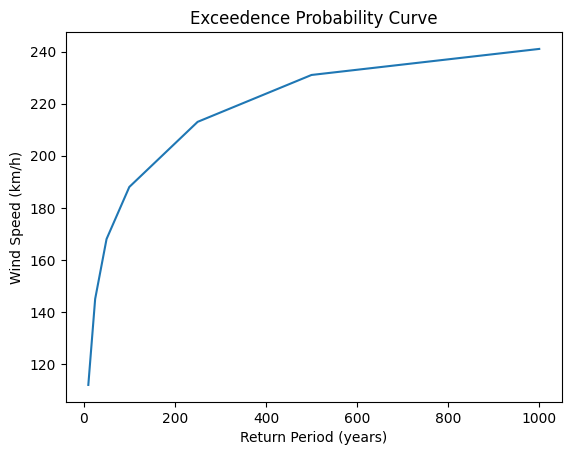

In [9]:
df_pointep = gpd.GeoDataFrame.from_features(results_pointep).set_index('cell_id')

pointep_years = [1/aep for aep in df_pointep.iloc[0]['aeps']]
pointep_winds = df_pointep.iloc[0]['windspeeds']

plt.plot(pointep_years, pointep_winds)
plt.title('Exceedence Probability Curve')
plt.xlabel('Return Period (years)')
plt.ylabel('Wind Speed (km/h)')
plt.show()

The code above converts the `pointep` results to a GeoDataFrame and extracts the years and corresponding windspeeds. It then plots the Exceedence Probability Curve using these values, showing the relationship between the return period (years) and the wind speed (in kilometers per hour).

Executing this code will display the Exceedence Probability Curve, providing insights into the probability of certain wind speeds occurring over different return periods.

### Query by Circle Gate

The `gate` method in DeepCyc returns TC maximum surface windspeeds for all events crossing or within a specified gate during a given epoch. The gate can be defined as a **line**, a **polygon**, or a **circle**. The values returned by the gate method are 1-minute averaged windspeeds with no terrain correction applied.

To test the usage of the gate method with a circle gate, you can use the following code:

In [10]:
lat_circle = 25.475
lon_circle = -80.465
radius_km = 50

results_circle = deepcyc_client.gate('circle', [lat_circle], [lon_circle], radius_km=radius_km)

df_circle = gpd.GeoDataFrame.from_features(results_circle)
df_circle

2023-06-22 13:48:16,322 - INFO - reaskapi.api_client:56 - querying deepcyc/gate took 5805ms


,geometry,event_id,location,windspeed,year_id
0,"POLYGON ((-79.96778 25.47500, -79.97017 25.426...","[4f86e1726b279a39c089, 21b4f3040cd8a37a1a5d, c...","[{'coordinates': [-80.313577, 25.75694], 'type...","[370, 369, 365, 354, 343, 337, 333, 328, 326, ...","[2005_0243_RAN, 2019_0326_RAN, 2005_0495_RAN, ..."


In this example, we define a circle gate with a center latitude of 30 and a center longitude of -90. The radius of the circle gate is set to 50 kilometers. The gate method is called with the gate type as 'circle', followed by the latitude, longitude, and the radius of the circle gate. The resulting data is stored in the results_circle variable.

Similar to the point method the results from gate returns a GeoJSON data structure containing the geometry of the gate, in this case a polygon representing the geodesic circle, and the following properties attributes:

- event_id: list of event ids
- location: list of event coordinates
- windspeed: list of wind speeds
- year_id: list with ids of the years

Let's visualize the spatial distribution of events selected by the circle gate using the Folium package:

In [11]:
# Helper function
def markers_from_df(df):
    lons = [l['coordinates'][0] for l in df.iloc[0]['location']]
    lats = [l['coordinates'][1] for l in df.iloc[0]['location']]
    
    assert len(lats) == len(lons)

    points = []
    for i in range(0, len(lats)):
        points.append([lats[i], lons[i]])

    k = FastMarkerCluster(data=points)
    
    return k

map_circle = Map(location=[lat_circle, lon_circle], zoom_start=8)

# Add a reference circle
circle_ref = Circle(location=(lat_circle, lon_circle), radius=radius_km*1000, color='red')
circle_ref.add_to(map_circle)

# Plot the circle geometry from results
circle_geom = GeoJson(results_circle['features'][0])
circle_geom.add_to(map_circle)

# Plot markers for the wind locations
circle_markers = markers_from_df(df_circle)
circle_markers.add_to(map_circle)

map_circle

In this example, we create a Folium map with a specified location and zoom level. The `Map` is used to create the base map, and we set the initial location using the location parameter and the desired zoom level using the zoom_start parameter.

Next, we add a reference circle to the map using the `Circle` class. The location parameter specifies the center of the circle, and the radius parameter is set to the desired radius of the circle in meters. We set the color of the circle to red using the color parameter. The circle is then added to the map using the `add_to` method.

After that, we plot the circle geometry obtained from the `results_circle` using the `GeoJson` class. The circle geometry is added to the map using the add_to method.

To visualize the event locations within the circle gate, we use the `markers_from_df` helper function to convert the DataFrame (`df_circle`) containing the results to a marker cluster. The marker cluster is added to the map using the `add_to` method.

Finally, the map is displayed by executing map_circle.

### Query by Line Gate
In addition to using a circle as a parameter for the gate function, we can also utilize a line to obtain the events crossing that line. This allows for a more specific selection of events based on their spatial relationship to the defined line.

To use a line gate, we need to define the latitude and longitude coordinates that form the line segment of interest:

In [12]:
# Define the latitude and longitude coordinates for the line
lats_line = [28.556358, 28.556358]
lons_line = [-92.770067, -87.070986]

# Retrieve the results using the line gate
results_line = deepcyc_client.gate('line', lats_line, lons_line)

# Convert the results to a GeoDataFrame
df_line = gpd.GeoDataFrame.from_features(results_line)

# Display the GeoDataFrame
df_line

2023-06-22 13:48:28,360 - INFO - reaskapi.api_client:56 - querying deepcyc/gate took 11686ms


,geometry,event_id,location,windspeed,year_id
0,"MULTILINESTRING ((-92.77007 28.55636, -87.0709...","[b07114bfa8ddb63fa27c, 96827d18ce9a256720c2, e...","[{'coordinates': [-87.600001, 28.556358], 'typ...","[393, 388, 384, 373, 373, 370, 369, 368, 367, ...","[1990_0706_RAN, 2014_0712_RAN, 1995_0747_RAN, ..."


Let's visualize the line gate and the events using the Folium package. This will provide a geographical representation of the line gate and individual markers for each event.

In [13]:
map_line = Map(location=(np.average(lats_line), np.average(lons_line)))

# Add reference line
line_ref = PolyLine(list(zip(lats_line, lons_line)), color='red')
line_ref.add_to(map_line)

# Add markers for the wind locations
markers_line = markers_from_df(df_line)
markers_line.add_to(map_line)

# Plot the map
map_line

### Query by Polygon Gate
Finally, let's explore an example of using a polygon as the parameter for the gate function and visualize the results.

In this example, we define the latitude and longitude coordinates of a polygon by specifying the vertices of a rectangle:

In [14]:
lats_polygon = [29, 30, 30, 29, 29]
lons_polygon = [-91, -91, -90, -90, -91]

results_polygon = deepcyc_client.gate('polygon', lats_polygon, lons_polygon)

df_polygon = gpd.GeoDataFrame.from_features(results_polygon)
df_polygon

2023-06-22 13:48:35,212 - INFO - reaskapi.api_client:56 - querying deepcyc/gate took 6246ms


,geometry,event_id,location,windspeed,year_id
0,"POLYGON ((-91.00000 29.00000, -91.00000 30.000...","[889ebae0c2236392ee80, 0c1a550c1301e2ea0649, 6...","[{'coordinates': [-90.989703, 29.042901], 'typ...","[360, 359, 353, 349, 344, 341, 338, 338, 338, ...","[2016_0368_RAN, 2014_0799_RAN, 1998_0980_RAN, ..."


In [15]:
map_polygon = Map(location=(np.average(lats_polygon), np.average(lons_polygon)), zoom_start=8)

# Create reference polygon
polygon = Polygon(list(zip(lats_polygon, lons_polygon)), color='red')
polygon.add_to(map_polygon)

# Add markers for the wind positions
markers_polygon = markers_from_df(df_polygon)
markers_polygon.add_to(map_polygon)

map_polygon

## Conclusion
In this tutorial, we have explored the basics of using Reask's Python client API to interact with DeepCyc, the Global Probabilistic Hazard Model for tropical cyclone risk. We have covered essential concepts such as querying data for specific locations using the point method, retrieving windspeeds based on exceedance probabilities using the pointaep method, and analyzing events within specific areas using the gate method.

By leveraging the power of the Reask Python client API, you can access high-resolution tropical cyclone risk data and gain valuable insights for decision-making, risk assessment, and disaster preparedness. The ability to retrieve detailed information on windspeeds, event identifiers, and other relevant attributes empowers you to understand and manage the potential impacts of tropical cyclones more effectively.

We encourage you to further explore the Reask Python client API documentation and experiment with different methods and parameters to tailor the analysis to your specific requirements. The flexibility and richness of the DeepCyc data, combined with the capabilities of the Python client API, offer tremendous opportunities for researchers, analists, policymakers, and stakeholders involved in tropical cyclone risk assessment and mitigation.

Remember to consult the official Reask documentation for more advanced features, integration possibilities, and additional use cases. We hope this tutorial has provided a solid foundation for utilizing the Reask Python client API and DeepCyc data effectively. Happy exploring and stay prepared for tropical cyclone events!